### Classificador para a flor Iris

O [conjunto de dados das flores Iris](https://www.airbnb.com.br/) é amplamente reconhecido na comunidade científica como uma ferramenta valiosa para análise de dados e aprendizado de máquina. Foi introduzido por Ronald Fisher em 1936 e coletado por Edgar Anderson como parte de seu estudo sobre a variação morfológica das flores Iris.

Este conjunto de dados é valorizado por sua simplicidade e clareza. Ele contém informações sobre três espécies de Iris: Iris Setosa, Iris virginica e Iris versicolor.

<center><img alt="Analisando Airbnb" width="50%" src="https://www.sakurai.dev.br/assets/images/posts/2018-10-17-classificacao-iris-01.png"></center>



**Sendo nuito utilizado devido à sua acessibilidade e fácil compreensão, o conjunto de dados das flores Iris é comumente utilizado classificação, como o estudo de caso que faremos neste notebook**




In [55]:
#Import dos pacotes necessários 

import pandas as pd 
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


## Obtenção dos dados 

Todos o dados utilizados neste notebook foram retirados da plataforma do [Kaggle](https://www.kaggle.com)

Para realizar a análise e classificação dos dados foi utilizado o seguinte dataset

- [IRIS.csv](https://www.kaggle.com/datasets/arshid/iris-flower-dataset) - Iris flower data set used for multi-class classification.


In [59]:
# Importar o arquivo IRIS.csv para um DataFrame

df = pd.read_csv('./dataset/IRIS.csv')

#### **Dicionário de variáveis**

Abaixo temos a descrição dos atributos contidos dentro desse conjunto de dados 

- `SepalLengthCM` - Comprimento da Sepala da flor
- `SepalWidthCM` - Largura da Sepala da flor
- `PetalLengthCM`-  Comprimento da petala da flor
- `PetalWidthCM`- Largura da petala da flor

Iremos analisar as cinco primeiras linhas desse dataset

In [60]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
df.shape

(150, 5)

## **Verificação de informações**

- Dado o exposto abaixo concluímos que não temos valores auxentes em nosso conjunto de dados. Conseguimos também verificar os tipos de cada atributo 

- Foi verificado a quantidade de amostras para cada espécie da Iris

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [62]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **Visualização dos dados**

Nesta etapa utilizamos de recursos visuais para entender de que forma os dados estavam organizados, sendo possível identificar uma certa semelança em termos de largura e tamanho das sépalas nas espécies Íris Virginica e íris Versicolo

<Axes: title={'center': 'Largura da sepala x comprimento da sepala'}, xlabel='sepal_length', ylabel='sepal_width'>

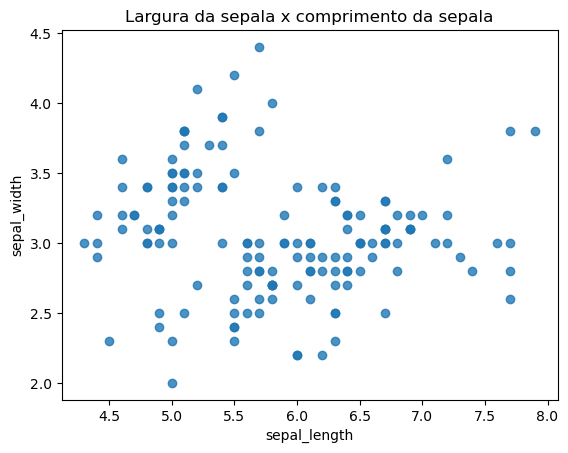

In [26]:
plt.title("Largura da sepala x comprimento da sepala")
sns.regplot(x="sepal_length", y="sepal_width", fit_reg=False, data=df)

<Axes: title={'center': 'Largura da petala x comprimento da petala'}, xlabel='petal_length', ylabel='petal_width'>

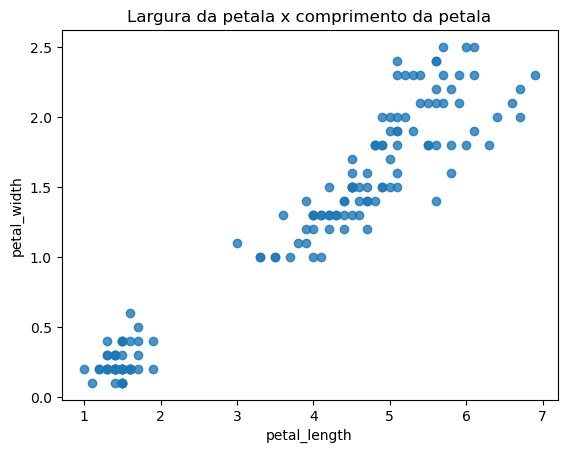

In [27]:
plt.title("Largura da petala x comprimento da petala")
sns.regplot(x="petal_length", y="petal_width", fit_reg=False, data=df)

c:\Users\Jp Lima\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


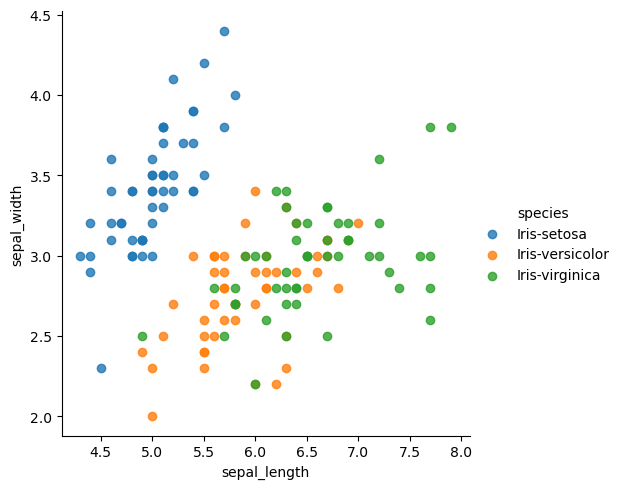

In [28]:
sns.lmplot(x="sepal_length", y="sepal_width", fit_reg=False, hue='species', data=df)

c:\Users\Jp Lima\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


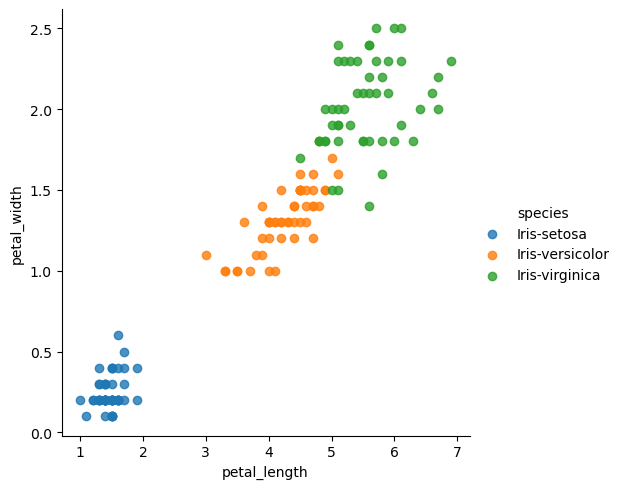

In [64]:
sns.lmplot(x="petal_length", y="petal_width", fit_reg=False, hue='species', data=df)

<Axes: xlabel='species', ylabel='sepal_length'>

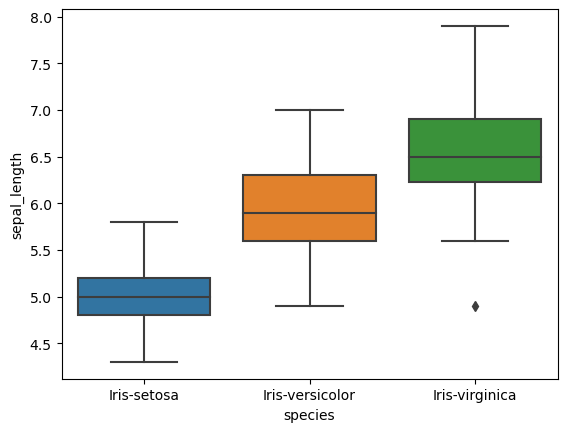

In [30]:
sns.boxplot(x='species', y ='sepal_length', data=df)

#### Shuffle no conjunto de dados

- Dado a forma que os dados estão dispostos em nosso dataset e o número limitado de dados, resolvi embaralhar os dados de forma a dificultar um pouco o overfitting desses dados 

In [53]:
df2 = shuffle(df)
df2 = df2.reset_index()
df2

,index,sepal_length,sepal_width,petal_length,petal_width,species
0,53,5.5,2.3,4.0,1.3,Iris-versicolor
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,85,6.0,3.4,4.5,1.6,Iris-versicolor
3,7,5.0,3.4,1.5,0.2,Iris-setosa
4,112,6.8,3.0,5.5,2.1,Iris-virginica
...,...,...,...,...,...,...
145,149,5.9,3.0,5.1,1.8,Iris-virginica
146,45,4.8,3.0,1.4,0.3,Iris-setosa
147,20,5.4,3.4,1.7,0.2,Iris-setosa
148,29,4.7,3.2,1.6,0.2,Iris-setosa


<Axes: >

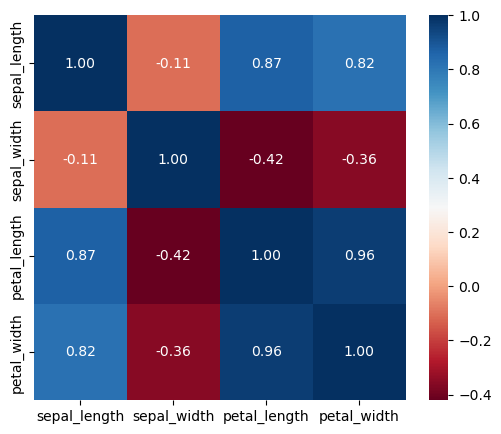

In [32]:
matrix_corr = df2[['sepal_length','sepal_width','petal_length','petal_width']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(fmt='.2f', cmap='RdBu', annot=True, data= matrix_corr)

#### Inicio da preparação dos modelos

In [44]:
X = df2[['sepal_length','sepal_width','petal_length','petal_width']]
y = df2.species


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [34]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
4,4.6,3.4,1.4,0.3
32,5.7,3.8,1.7,0.3
142,5.8,2.7,5.1,1.9
85,4.9,2.4,3.3,1.0
86,6.0,3.0,4.8,1.8


In [35]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
73,5.1,3.8,1.6,0.2
18,5.5,2.4,3.8,1.1
118,6.3,2.9,5.6,1.8
78,6.3,3.3,6.0,2.5
76,4.8,3.0,1.4,0.1


#### KNN - Kn

In [36]:
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [37]:
y_pred = model_knn.predict(X_test)

In [38]:

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.85      1.00      0.92        11
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.94        38
   weighted avg       0.96      0.95      0.95        38



#### Decision Tree

In [41]:
model_decisiontree = tree.DecisionTreeClassifier()
model_decisiontree = model_decisiontree.fit(X_train,y_train)

In [51]:
y_pred_tree = model_decisiontree.predict(X_test)

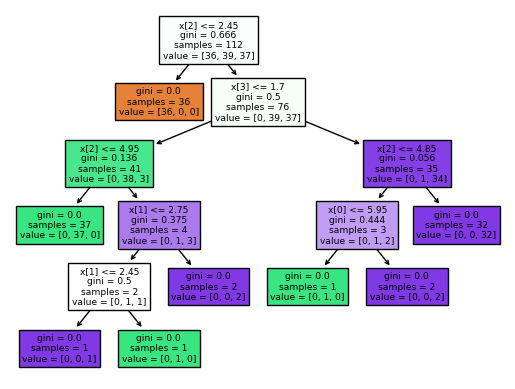

In [48]:
tree.plot_tree(model_decisiontree, filled=True);
plt.show()

In [52]:
print(classification_report(y_test, y_pred_tree))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.90        30
   weighted avg       0.90      0.90      0.90        30

